# Analysing evaluation results for composite reward with accum waiting time for 4x4grid_resco_train

In [2]:
import os
import pandas as pd
import numpy as np
import sys 

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

sys.path.append(os.path.abspath('../'))
from data_analysis_functions import generate_summary_df_from_csv, \
                                    get_df_from_csv, \
                                    get_trained_and_fixed_from_csv, \
                                    generate_summary_df_from_csv_for_4x4grid_resco # type: ignore

In [3]:
path_to_save_figs = os.path.abspath("images_for_report_4x4")
figsize = (10,6)
path_to_save_figs

'/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/data_analysis_for_4x4resco/images_for_report_4x4'

In [4]:
eval_folder_type = "original_scaled_route_flow_file_evaluation"

In [5]:
TRAINED_CHECKPOINT_PATHS = ["azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_3s/EVALUATION/PPO_2024-05-22_06_54__alpha_1",
                            f"azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_3s_continue/EVALUATION/{eval_folder_type}/PPO_2024-05-25_02_37__alpha_1",
                            f"azure_train/4x4grid_resco_train/4x4grid_env_resco_train_with_capped_reward_reduced_obs_3s/EVALUATION/{eval_folder_type}/PPO_2024-05-21_21_57__alpha_1_neighbour_observations_3s",
                            ]
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [19]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_1_entire_obs_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
    #                                 eval_dir = "trained", 
    #                                 df_row_label = "trained_1",
    #                                 seed = seed)
    trained_1_reduced_obs_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "trained_1_reduced_obs",
                                    seed = seed)
    trained_1_entire_obs_continued_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "trained_1_continued",
                                    seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df,
                                    #  trained_1_entire_obs_df, 
                                     trained_1_entire_obs_continued_df,
                                     trained_1_reduced_obs_df], axis=0)

    return alpha_experiment_df

get dfs for all seeds, and concat

In [20]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 39, 22]
SUMO_SEEDS = [39, 22, 10, 51, 49, 74]
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS_2 = [771, 904, 5559, 6009, 7021, 8932, 10022, 34030, 60142, 72944, 84013, 97903]

SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74, 771, 904, 5559, 6009, 7021, 8932, 10022, 34030]
alpha_dfs = [concaten_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined
# alpha_dfs


sys_abs_accel_episode_mean  sys_abs_accel_episode_mean_var  sys_abs_accel_episode_rms  sys_abs_accel_episode_var  sys_abs_accel_episode_rms_with_integ  sys_abs_accel_episode_sum  sys_abs_accel_episode_integral  sys_abs_accel_episode_ms  sys_avg_speed_episode_mean  sys_avg_speed_episode_max  sys_avg_speed_episode_min  sys_avg_speed_episode_range  sys_avg_speed_episode_median  sys_avg_speed_episode_variance  sys_total_stopped_episode_mean  sys_avg_waiting_time_total_episode_mean  sys_avg_waiting_time_episode_mean  tot_agent_accum_wait_time
fixed_tc                                53.981097                        0.058354                  56.618630                 291.768773                             56.615604              269905.486418                   269876.216551               3205.669284                    7.715497                  15.287334                   4.227964                    11.059370                      7.619598                        1.748786                         24.4442                                 481.0816                           6.009282                150331.0625
trained_1_continued                     51.845953                        0.031151                  53.326601                 155.754772                             53.324831              259229.762507                   259208.035090               2843.726412                    8.666241                  15.287334                   5.936376                     9.350958                      8.655945                        0.738210                         16.5264                                 316.0884                           4.422154                 98775.0000
trained_1_reduced_obs                   48.229697                        0.026782                  49.598241                 133.908602                             49.595994              241148.484302                   241124.879662               2459.985479                    9.643336                  15.287334                   7.381252                     7.906082                      9.632888                        0.599948                         10.4352                                 148.5686                           2.291814                 46426.5625
fixed_tc                                54.285347                        0.062377                  57.085212                 311.884818                             57.081159              271426.737170                   271392.727614               3258.721387                    7.712665                  13.301759                   4.522000                     8.779759                      7.608413                        1.515696                         24.6918                                 493.2582                           6.095843                154140.2500
trained_1_continued                     52.333225                        0.033655                  53.916696                 168.277298                             53.909053              261666.124943                   261620.735223               2907.010080                    8.724842                  13.301759                   5.780115                     7.521644                      8.691372                        0.654342                         16.2628                                 316.6738                           4.395866                 98947.8750
trained_1_reduced_obs                   48.687233                        0.028030                  50.105580                 140.150512                             50.100227              243436.167315                   243399.546252               2510.569184                    9.617271                  13.301759                   7.398191                     5.903567                      9.618977                        0.526123                         10.5726                                 155.0034                           2.367226                 48430.3125
fixed_tc                                56.747875     

get the maximum variance

In [21]:
alpha_df_combined.loc['fixed_tc', 'sys_abs_accel_episode_mean_var'].max()

0.06509820336231349

In [22]:
alpha_df_combined.loc['trained_1_continued', 'sys_abs_accel_episode_mean_var'].max()

0.03365545957574461

In [23]:
alpha_df_combined.loc['trained_1_continued', 'sys_abs_accel_episode_mean_var'].max()

0.03365545957574461

In [24]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

sys_abs_accel_episode_mean  sys_abs_accel_episode_mean_var  sys_abs_accel_episode_rms  sys_abs_accel_episode_var  sys_abs_accel_episode_rms_with_integ  sys_abs_accel_episode_sum  sys_abs_accel_episode_integral  sys_abs_accel_episode_ms  sys_avg_speed_episode_mean  sys_avg_speed_episode_max  sys_avg_speed_episode_min  sys_avg_speed_episode_range  sys_avg_speed_episode_median  sys_avg_speed_episode_variance  sys_total_stopped_episode_mean  sys_avg_waiting_time_total_episode_mean  sys_avg_waiting_time_episode_mean  tot_agent_accum_wait_time
fixed_tc                                53.486213                        0.056761                  56.074545                 283.806343                             56.072186              267431.067039                   267405.713677               3146.453149                    7.704446                  14.226912                   1.634368                    12.592544                      7.630375                        1.683842                       24.469078                               489.869044                           6.150844              153078.131944
trained_1_continued                     51.248419                        0.029222                  52.653658                 146.112151                             52.650515              256242.095035                   256214.164935               2774.607805                    8.696238                  14.230249                   2.329719                    11.900530                      8.683769                        0.692772                       16.222322                               318.439878                           4.480781               99501.506944
trained_1_reduced_obs                   48.037155                        0.025370                  49.338893                 126.848065                             49.336329              240185.772986                   240161.140027               2436.033142                    9.641087                  14.236796                   2.712637                    11.524159                      9.639369                        0.579294                       10.262978                               140.289667                           2.174866               43834.847222

Average Waiting Time On Average Per Agent

## Get waiting times and standard deviation

In [25]:
agent_ids = ["A0", "A1", "A2", "A3", "B0", "B1", "B2", "B3", "C0", "C1", "C2", "C3", "D0", "D1", "D2", "D3"]

eval_metrics_df = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='fixed_tc', seed=seed, csv_file_name="eval_metrics.csv") for seed in SUMO_SEEDS], axis=0)

eval_metrics_averaged_over_seeds = eval_metrics_df.groupby(eval_metrics_df.index)

eval_metrics_averaged_over_seeds_mean = eval_metrics_averaged_over_seeds.mean()

tot_agent_accum_wait_time = pd.concat([eval_metrics_averaged_over_seeds_mean[f"{id}_waiting_time"] for id in agent_ids], axis=1)

tot_agent_accum_wait_time_mean_timestep = tot_agent_accum_wait_time.groupby(tot_agent_accum_wait_time.index).mean()

tot_agent_accum_wait_time_mean_timestep.mean(axis=0).mean(), tot_agent_accum_wait_time_mean_timestep.mean(axis=1).mean()

(30.61562638888891, 30.615626388888888)

In [26]:
waiting_time_agent_labels = [f"{id}_waiting_time" for id in agent_ids]

In [27]:
tot_agent_accum_wait_time[waiting_time_agent_labels].mean().std()

3.8649429161354507

In [28]:
eval_metrics_df = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', seed=seed, csv_file_name="eval_metrics.csv") for seed in SUMO_SEEDS], axis=0)

eval_metrics_averaged_over_seeds = eval_metrics_df.groupby(eval_metrics_df.index).mean()

tot_agent_accum_wait_time = pd.concat([eval_metrics_averaged_over_seeds[f"{id}_waiting_time"] for id in agent_ids], axis=1)

tot_agent_accum_wait_time_mean_timestep = tot_agent_accum_wait_time.groupby(tot_agent_accum_wait_time.index).mean()

tot_agent_accum_wait_time_mean_timestep.mean(axis=0).mean(), tot_agent_accum_wait_time_mean_timestep.mean(axis=1).mean()

(19.900301388888874, 19.90030138888889)

In [29]:
tot_agent_accum_wait_time[waiting_time_agent_labels].mean().std()

1.2553345906701217

In [30]:
eval_metrics_df = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[2], eval_dir='trained', seed=seed, csv_file_name="eval_metrics.csv") for seed in SUMO_SEEDS], axis=0)

eval_metrics_averaged_over_seeds = eval_metrics_df.groupby(eval_metrics_df.index).mean()

tot_agent_accum_wait_time = pd.concat([eval_metrics_averaged_over_seeds[f"{id}_waiting_time"] for id in agent_ids], axis=1)

tot_agent_accum_wait_time_mean_timestep = tot_agent_accum_wait_time.groupby(tot_agent_accum_wait_time.index).mean()

tot_agent_accum_wait_time_mean_timestep.mean(axis=0).mean(), tot_agent_accum_wait_time_mean_timestep.mean(axis=1).mean()

(8.766969444444442, 8.766969444444443)

In [31]:
tot_agent_accum_wait_time[waiting_time_agent_labels].mean().std()

1.537095932145188

## Columns of interest to compare across:

In [32]:
subset_for_stats_test = df_average_whole_experiment[
                            ['sys_abs_accel_episode_mean', 
                             'sys_abs_accel_episode_sum',
                             "sys_abs_accel_episode_mean_var",
                             "sys_abs_accel_episode_var",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_integral", 
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "sys_abs_accel_episode_rms"]]

In [33]:
subset_for_stats_test = df_average_whole_experiment[
                            ['sys_abs_accel_episode_mean',
                             "sys_abs_accel_episode_rms_with_integ",
                             "sys_abs_accel_episode_rms",
                             "sys_abs_accel_episode_sum",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_avg_waiting_time_total_episode_mean",
                             "sys_abs_accel_episode_var"]]

In [34]:
subset_for_stats_test

sys_abs_accel_episode_mean  sys_abs_accel_episode_rms_with_integ  sys_abs_accel_episode_rms  sys_abs_accel_episode_sum  sys_avg_waiting_time_episode_mean  sys_avg_waiting_time_total_episode_mean  sys_abs_accel_episode_var
fixed_tc                                53.486213                             56.072186                  56.074545              267431.067039                           6.150844                               489.869044                 283.806343
trained_1_continued                     51.248419                             52.650515                  52.653658              256242.095035                           4.480781                               318.439878                 146.112151
trained_1_reduced_obs                   48.037155                             49.336329                  49.338893              240185.772986                           2.174866                               140.289667                 126.848065

In [35]:
subset_for_stats_test[['sys_abs_accel_episode_sum',
                       'sys_abs_accel_episode_var',
                       'sys_avg_waiting_time_episode_mean']]

sys_abs_accel_episode_sum  sys_abs_accel_episode_var  sys_avg_waiting_time_episode_mean
fixed_tc                           267431.067039                 283.806343                           6.150844
trained_1_continued                256242.095035                 146.112151                           4.480781
trained_1_reduced_obs              240185.772986                 126.848065                           2.174866

## Create table for emissions + variance only

In [36]:
summary_stats = pd.DataFrame(columns=['System Total Emissions',
                      'System Total Emissions Variance'], 
                    index=['Fixed Time Control',
                            'CODC',
                            'DODC'])

In [37]:
summary_stats.loc["Fixed Time Control", 'System Total Emissions'] = round(subset_for_stats_test.loc["fixed_tc", 'sys_abs_accel_episode_sum']/100)
summary_stats.loc["CODC", 'System Total Emissions'] = round(subset_for_stats_test.loc["trained_1_continued", 'sys_abs_accel_episode_sum']/100)
summary_stats.loc["DODC", 'System Total Emissions'] = round(subset_for_stats_test.loc["trained_1_reduced_obs", 'sys_abs_accel_episode_sum']/100)

summary_stats.loc["Fixed Time Control", 'System Total Emissions Variance'] = round(subset_for_stats_test.loc["fixed_tc", 'sys_abs_accel_episode_var'], 1)
summary_stats.loc["CODC", 'System Total Emissions Variance'] = round(subset_for_stats_test.loc["trained_1_continued", 'sys_abs_accel_episode_var'], 1)
summary_stats.loc["DODC", 'System Total Emissions Variance'] = round(subset_for_stats_test.loc["trained_1_reduced_obs", 'sys_abs_accel_episode_var'], 1)

In [38]:
summary_stats

System Total Emissions System Total Emissions Variance
Fixed Time Control                   2674                           283.8
CODC                                 2562                           146.1
DODC                                 2402                           126.8

In [39]:
from pprint import pprint
pprint(summary_stats.to_latex())

('\\begin{tabular}{lll}\n'
 '\\toprule\n'
 ' & System Total Emissions & System Total Emissions Variance \\\\\n'
 '\\midrule\n'
 'Fixed Time Control & 2674 & 283.800000 \\\\\n'
 'CODC & 2562 & 146.100000 \\\\\n'
 'DODC & 2402 & 126.800000 \\\\\n'
 '\\bottomrule\n'
 '\\end{tabular}\n')


## Metrics During Evaluation

In [40]:
fixed_tc_eval_metrics_concat = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='fixed_tc', csv_file_name="eval_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_eval_metrics_concat =  pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name="eval_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_eval_metrics_reduced = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[2], eval_dir='trained', csv_file_name="eval_metrics.csv", seed=seed) for seed in SUMO_SEEDS])

Average time series over all seeds:

In [41]:
fixed_tc_eval_metrics_averaged_seeds = fixed_tc_eval_metrics_concat.groupby(fixed_tc_eval_metrics_concat.index).mean()
trained_eval_metrics_averaged_seeds = trained_eval_metrics_concat.groupby(trained_eval_metrics_concat.index).mean()
trained_eval_metrics_reduced_averaged_seeds = trained_eval_metrics_reduced.groupby(trained_eval_metrics_reduced.index).mean()

In [42]:
trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       48.037155
std         5.891085
min         0.000000
25%        46.459372
50%        48.632201
75%        50.832210
max        58.732268
Name: system_abs_accel, dtype: float64

Groups each data point from every seed-specific simulation, e.g. taking the standard deviation of all data points that correspond to t = 0, t = 5, etc

In [43]:
fixed_tc_eval_metrics_std_seeds = fixed_tc_eval_metrics_concat.groupby(fixed_tc_eval_metrics_concat.index).std()
trained_eval_metrics_std_seeds = trained_eval_metrics_concat.groupby(trained_eval_metrics_concat.index).std()
trained_eval_metrics_reduced_std_seeds = trained_eval_metrics_reduced.groupby(trained_eval_metrics_reduced.index).std()

In [44]:
fixed_tc_eval_metrics_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       53.486213
std        13.407484
min         0.000000
25%        44.096818
50%        52.163934
75%        62.605840
max        86.136668
Name: system_abs_accel, dtype: float64

In [45]:
trained_eval_metrics_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       51.248419
std         6.443639
min         0.000000
25%        49.727777
50%        51.958773
75%        54.267509
max        62.702422
Name: system_abs_accel, dtype: float64

In [46]:
trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'].describe()

count    5000.000000
mean       48.037155
std         5.891085
min         0.000000
25%        46.459372
50%        48.632201
75%        50.832210
max        58.732268
Name: system_abs_accel, dtype: float64

## Compare System Emissions and Agent Emissions

In [47]:
ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]

In [48]:
fixed_tc_eval_metrics_averaged_seeds = fixed_tc_eval_metrics_concat.groupby(fixed_tc_eval_metrics_concat.index).mean()
trained_eval_metrics_averaged_seeds = trained_eval_metrics_concat.groupby(trained_eval_metrics_concat.index).mean()
trained_eval_metrics_reduced_averaged_seeds = trained_eval_metrics_reduced.groupby(trained_eval_metrics_reduced.index).mean()

In [49]:
sum_emissions_over_all_agents_fixed = 0
for id in ids:
    sum_emissions_over_all_agents_fixed += fixed_tc_eval_metrics_averaged_seeds[f'{id}_abs_accel'].sum()

In [50]:
sum_emissions_over_all_agents_CODC = 0
for id in ids:
    sum_emissions_over_all_agents_CODC += trained_eval_metrics_averaged_seeds[f'{id}_abs_accel'].sum()

In [51]:
sum_emissions_over_all_agents_DODC = 0
for id in ids:
    sum_emissions_over_all_agents_DODC += trained_eval_metrics_reduced_averaged_seeds[f'{id}_abs_accel'].sum()

In [52]:
sum_emissions_over_all_agents_fixed, \
    sum_emissions_over_all_agents_CODC/ sum_emissions_over_all_agents_fixed, \
    sum_emissions_over_all_agents_CODC, \
    sum_emissions_over_all_agents_DODC/sum_emissions_over_all_agents_CODC, \
        sum_emissions_over_all_agents_DODC

(191756.96695972054,
 0.9513353531712877,
 182425.18188568068,
 0.9315662386712276,
 169941.1405281581)

In [53]:
fixed_tc_eval_metrics_averaged_seeds['system_abs_accel'].sum(), \
    trained_eval_metrics_averaged_seeds['system_abs_accel'].sum()/fixed_tc_eval_metrics_averaged_seeds['system_abs_accel'].sum(), \
    trained_eval_metrics_averaged_seeds['system_abs_accel'].sum(), \
    trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'].sum()/trained_eval_metrics_averaged_seeds['system_abs_accel'].sum(), \
        trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'].sum()

(267431.06703877763,
 0.95816128571891,
 256242.0950350552,
 0.9373392492467149,
 240185.772985564)

we can see from above that the the system emissions varies with the models at the same rate that the individual agent emisions total varies with the models. Good finding

## Analysing waiting times - RESCO

In [54]:
ids = ["A3", "B3", "C3", "D3",
       "A2", "B2", "C2", "D2",
       "A1", "B1", "C1", "D1",
       "A0", "B0", "C0", "D0"]

In [55]:
np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]), \
    np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_accumulated_waiting_time'].mean() for id in ids]), \
                    np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_stopped'].mean() for id in ids])


(8.766969444444445, 8.888556944444444, 0.6410194444444444)

In [56]:
np.mean([trained_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]), \
    np.mean([trained_eval_metrics_averaged_seeds[f'{id}_accumulated_waiting_time'].mean() for id in ids]), \
            np.mean([trained_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])

(19.90030138888889, 20.376643055555554, 1.01325)

In [57]:
np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]), \
    np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_accumulated_waiting_time'].mean() for id in ids]), \
        np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])

(30.61562638888889, 31.57602361111111, 1.52884375)

In [58]:
fixed_tc_eval_metrics_averaged_seeds['sys_arrived_vehicles_at_destination'].sum(), \
    trained_eval_metrics_averaged_seeds['sys_arrived_vehicles_at_destination'].sum(), \
        trained_eval_metrics_reduced_averaged_seeds['sys_arrived_vehicles_at_destination'].sum()

(1953.2222222222222, 1961.2777777777778, 1969.111111111111)

In [59]:
fixed_tc = {'Avg Wait': np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]),
'Avg Queue': np.mean([fixed_tc_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])}

fixed_df = pd.DataFrame(fixed_tc.values(), index=["Avg Wait", "Avg Queue"], columns=['Fixed Time'])

In [60]:
trained_CODC = {'Avg Wait': np.mean([trained_eval_metrics_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]),
'Avg Queue': np.mean([trained_eval_metrics_averaged_seeds[f'{id}_stopped'].mean() for id in ids])}

trained_CODC_df = pd.DataFrame(trained_CODC.values(), index=["Avg Wait", "Avg Queue"], columns=['NEE CODC'])

In [61]:
trained_DODC = {'Avg Wait': np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_waiting_time'].mean() for id in ids]),
'Avg Queue': np.mean([trained_eval_metrics_reduced_averaged_seeds[f'{id}_stopped'].mean() for id in ids])}

trained_DODC_df = pd.DataFrame(trained_DODC.values(), index=["Avg Wait", "Avg Queue"], columns=['NEE DODC'])

In [62]:
my_resco_results_df = pd.concat([fixed_df,trained_CODC_df,trained_DODC_df], axis=1)

In [63]:
my_resco_results_df.loc['Avg Wait', 'IDQN'] = 11.59
my_resco_results_df.loc['Avg Wait', 'MPLight'] = 20.21
my_resco_results_df.loc['Avg Wait', 'IPPO'] = 18.93
my_resco_results_df.loc['Avg Wait', 'FMA2C'] = 71.42

In [64]:
my_resco_results_df.loc['Avg Queue', 'IDQN'] = 0.33
my_resco_results_df.loc['Avg Queue', 'MPLight'] = 0.55
my_resco_results_df.loc['Avg Queue', 'IPPO'] = 0.5
my_resco_results_df.loc['Avg Queue', 'FMA2C'] = 1.74

In [65]:
my_resco_results_df

Fixed Time   NEE CODC  NEE DODC   IDQN  MPLight   IPPO  FMA2C
Avg Wait    30.615626  19.900301  8.766969  11.59    20.21  18.93  71.42
Avg Queue    1.528844   1.013250  0.641019   0.33     0.55   0.50   1.74

In [66]:
print(my_resco_results_df.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
 & Fixed Time & NEE CODC & NEE DODC & IDQN & MPLight & IPPO & FMA2C \\
\midrule
Avg Wait & 30.615626 & 19.900301 & 8.766969 & 11.590000 & 20.210000 & 18.930000 & 71.420000 \\
Avg Queue & 1.528844 & 1.013250 & 0.641019 & 0.330000 & 0.550000 & 0.500000 & 1.740000 \\
\bottomrule
\end{tabular}



## System Delay Metrics

In [67]:
1/trained_eval_metrics_reduced_averaged_seeds['sys_accum_waiting_time'].mean(), \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_stopped'].mean(), \
    trained_eval_metrics_reduced_averaged_seeds['sys_avg_wait'].mean(), \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_wait'].mean()

(0.000989845831511742,
 10.262977777777778,
 2.1748657339815325,
 140.28966666666668)

In [68]:
1/trained_eval_metrics_reduced_averaged_seeds['sys_accum_waiting_time'].mean()/16, \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_stopped'].mean()/16, \
    trained_eval_metrics_reduced_averaged_seeds['sys_avg_wait'].mean()/16, \
    trained_eval_metrics_reduced_averaged_seeds['sys_total_wait'].mean()/16

(6.186536446948388e-05,
 0.6414361111111111,
 0.13592910837384578,
 8.768104166666667)

## Raw Histogram Emissions

In [69]:
# import matplotlib.pyplot as plt

# # Enable SVG inline rendering
# %config InlineBackend.figure_format = 'svg'

# # Set plot style
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=figsize)

# # Histogram for fixed_tc_eval_metrics_averaged_seeds
# ax.hist(fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"], bins=40, color='skyblue', alpha=0.7, edgecolor='grey', label='Fixed Time Control')

# # Histogram for trained_eval_metrics_reduced_averaged_seeds
# ax.hist(trained_eval_metrics_averaged_seeds["system_abs_accel"], bins=40, color='lightgreen', alpha=0.5, edgecolor='grey', label='NEE CODC Model')

# # Histogram for trained_eval_metrics_reduced_averaged_seeds
# ax.hist(trained_eval_metrics_reduced_averaged_seeds["system_abs_accel"], bins=40, color='grey', alpha=0.5, edgecolor='grey', label='NEE DODC Model')

# # Set titles and labels
# # ax.set_title('System Absolute Acceleration Comparison')
# ax.set_xlabel('System Emissions (E/s)', fontsize=12)
# ax.set_ylabel('Frequency', fontsize=12)

# # Add legend
# ax.legend()

# # Display plot
# plt.tight_layout(rect=[0, 0, 1, 1])

# plt.savefig(os.path.join(path_to_save_figs, "system_emissions_histplot.pdf"))

# plt.show()

## System Emissions Time Series plots Averaged over All Seeds

In [70]:
def generate_time_series_comparison_plot(key, ax, with_std=False):

    dark_colours = ["#4682B4", "#3CB371", "#696969"]
    light_colours = ['#87CEEB', '#90EE90', '#808080']

    fixed_df_mean = fixed_tc_eval_metrics_averaged_seeds[key]
    CODC_df_mean = trained_eval_metrics_averaged_seeds[key]
    DODC_df_mean = trained_eval_metrics_reduced_averaged_seeds[key]
    
    fixed_df_std = fixed_tc_eval_metrics_std_seeds[key]
    CODC_df_std = trained_eval_metrics_std_seeds[key]
    DODC_df_std = trained_eval_metrics_reduced_std_seeds[key]

    # Histogram for fixed_tc_eval_metrics_averaged_seeds
    ax.plot(fixed_df_mean, color=light_colours[0], alpha=0.7, label='Fixed Time Control')

    # Histogram for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(CODC_df_mean, color=light_colours[1], alpha=0.7, label='CODC Model')

    # Histogram for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(DODC_df_mean, color=light_colours[2], alpha=0.7, label='DTCE Model')

    if with_std:
        plt.fill_between(range(len(fixed_df_mean)), fixed_df_mean - fixed_df_std, fixed_df_mean + fixed_df_std, color=light_colours[0], alpha=0.2, label='±1 std. dev.')
        plt.fill_between(range(len(CODC_df_mean)), CODC_df_mean - CODC_df_std, CODC_df_mean + CODC_df_std, color=light_colours[1], alpha=0.2, label='±1 std. dev.')
        plt.fill_between(range(len(DODC_df_mean)), DODC_df_mean - DODC_df_std, DODC_df_mean + DODC_df_std, color=light_colours[2], alpha=0.2, label='±1 std. dev.')

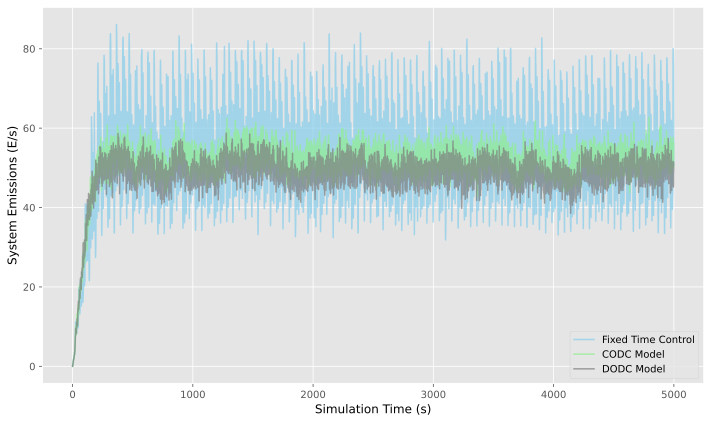

In [71]:
import matplotlib.pyplot as plt

# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

generate_time_series_comparison_plot("system_abs_accel", ax, with_std=False)

# Set titles and labels
# ax.set_title('System Absolute Acceleration Comparison')
ax.set_xlabel('Simulation Time (s)', fontsize=12)
ax.set_ylabel('System Emissions (E/s)', fontsize=12)

# Add legend
ax.legend(['Fixed Time Control',
           'CODC Model',
           'DODC Model'])

# Display plot
plt.tight_layout(rect=[0,0,1,1])

plt.savefig(os.path.join(path_to_save_figs, "system_emissions_time_series.pdf"))

plt.show()

## Partial Time Series Plots

In [72]:
# def generate_time_series_comparison_plot_shorter(key, ax, end, with_std=False):

#     dark_colours = ["#4682B4", "#3CB371", "#696969"]
#     light_colours = ['#87CEEB', '#90EE90', '#808080']
#     fixed_df_mean = fixed_tc_eval_metrics_averaged_seeds[key][0:end]
#     CODC_df_mean = trained_eval_metrics_averaged_seeds[key][0:end]
#     DODC_df_mean = trained_eval_metrics_reduced_averaged_seeds[key][0:end]
    
#     fixed_df_std = fixed_tc_eval_metrics_std_seeds[key][0:end]
#     CODC_df_std = trained_eval_metrics_std_seeds[key][0:end]
#     DODC_df_std = trained_eval_metrics_reduced_std_seeds[key][0:end]

#     # Histogram for fixed_tc_eval_metrics_averaged_seeds
#     ax.plot(fixed_df_mean, color=dark_colours[0], alpha=0.7, label='Fixed Time Control')

#     # Histogram for trained_eval_metrics_reduced_averaged_seeds
#     ax.plot(CODC_df_mean, color=dark_colours[1], alpha=0.7, label='NEE CODC Model')

#     # Histogram for trained_eval_metrics_reduced_averaged_seeds
#     ax.plot(DODC_df_mean, color=dark_colours[2], alpha=0.7, label='NEE DTCE Model')

#     if with_std:
#         plt.fill_between(range(len(fixed_df_mean)), fixed_df_mean - fixed_df_std, fixed_df_mean + fixed_df_std, color=light_colours[0], alpha=0.2, label='±1 std. dev.')
#         plt.fill_between(range(len(CODC_df_mean)), CODC_df_mean - CODC_df_std, CODC_df_mean + CODC_df_std, color=light_colours[1], alpha=0.2, label='±1 std. dev.')
#         plt.fill_between(range(len(DODC_df_mean)), DODC_df_mean - DODC_df_std, DODC_df_mean + DODC_df_std, color=light_colours[2], alpha=0.2, label='±1 std. dev.')

In [73]:
# %config InlineBackend.figure_format = 'svg'

# # Set plot style
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=figsize)

# generate_time_series_comparison_plot_shorter("sys_avg_wait", ax, 600, with_std=True)

# ax.set_xlabel('Simulation Time (s)', fontsize=12)
# ax.set_ylabel('System Avg Wait (s)', fontsize=12)
# ax.legend()
# plt.tight_layout(rect=[0,0,1,1])
# plt.show()

## SYSTEM Time Series for Average Wait 

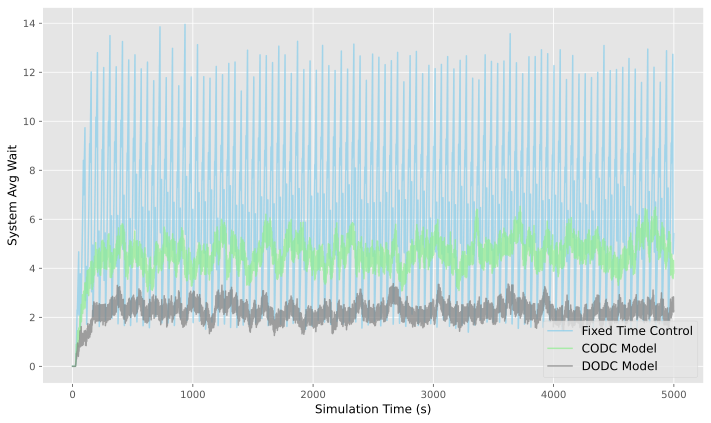

In [74]:
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

generate_time_series_comparison_plot("sys_avg_wait", ax)

ax.set_xlabel('Simulation Time (s)', fontsize=12)
ax.set_ylabel('System Avg Wait', fontsize=12)
# ax.legend(loc='lower right', fontsize='12')

# Add legend
ax.legend(['Fixed Time Control',
           'CODC Model',
           'DODC Model'], loc='lower right', fontsize='12')

plt.tight_layout(rect=[0,0,1,1])

plt.savefig(os.path.join(path_to_save_figs, "system_avg_wait_time_series.pdf"))

plt.show()

## Emissions Time series for individual Policies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

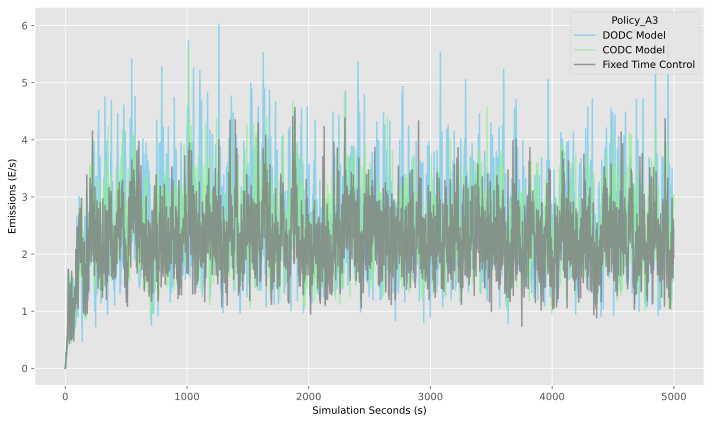

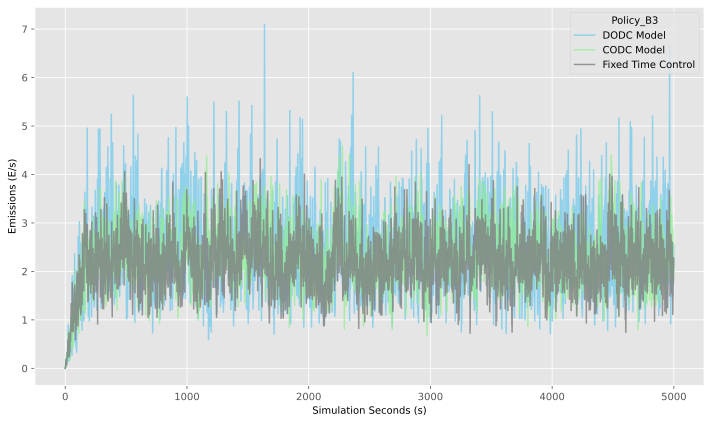

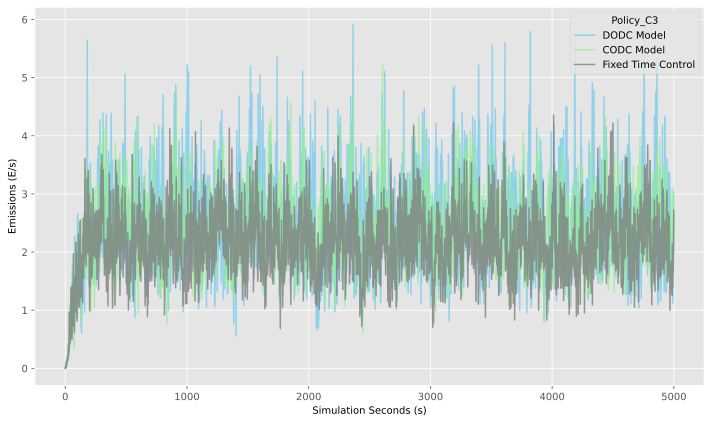

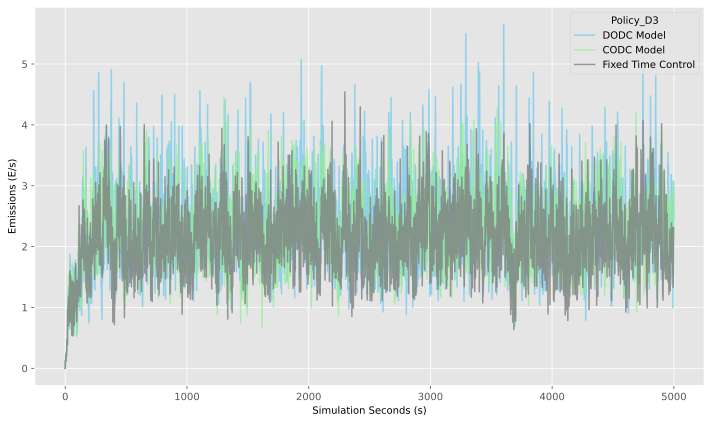

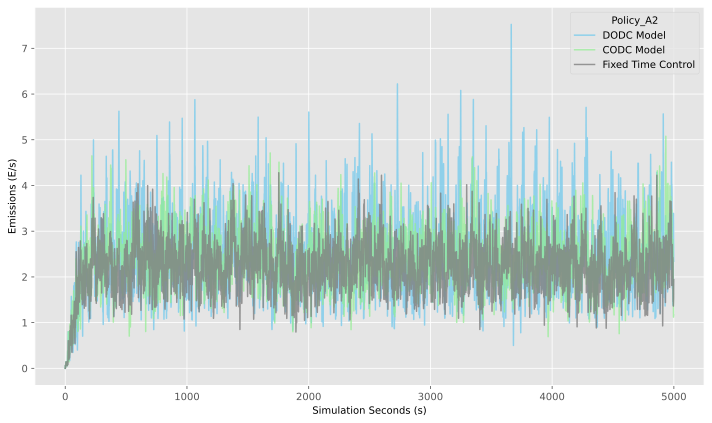

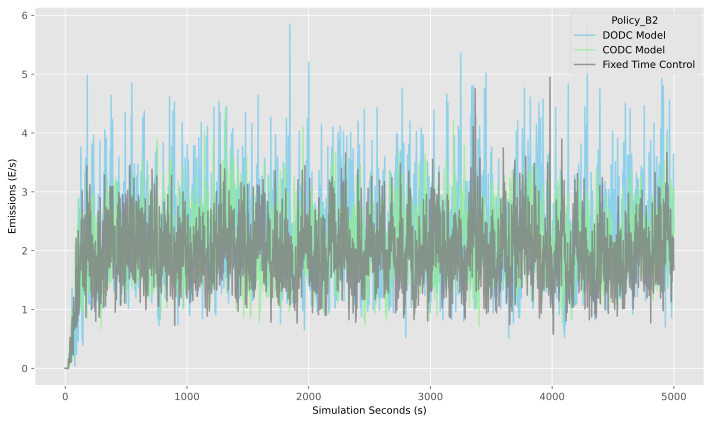

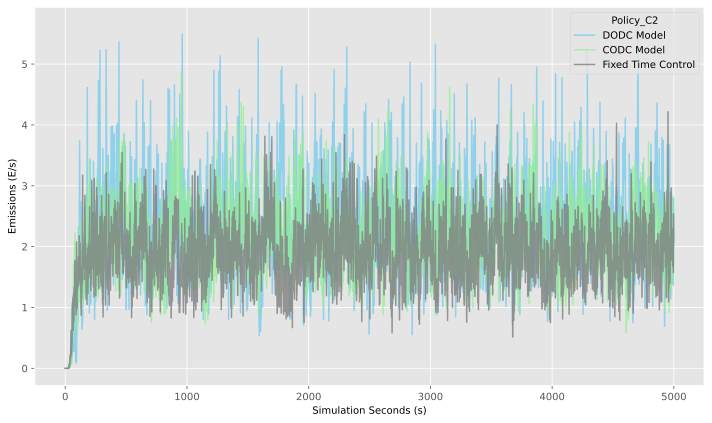

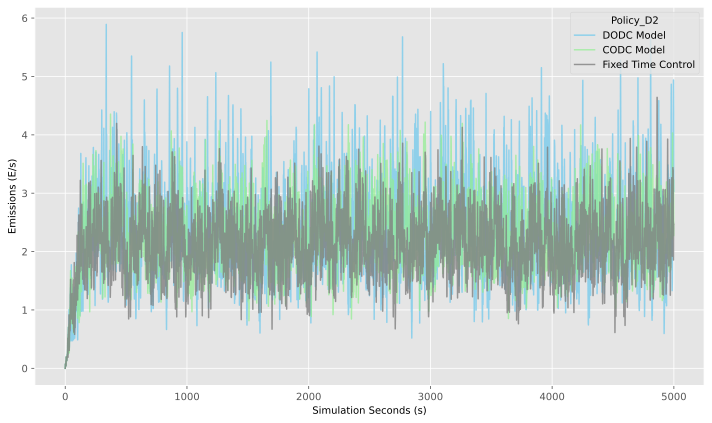

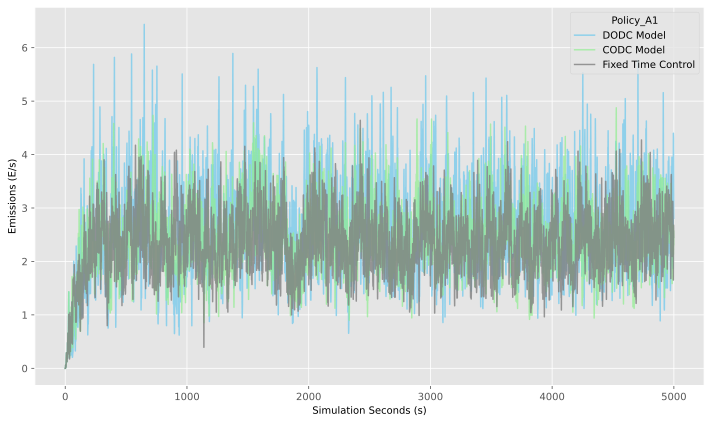

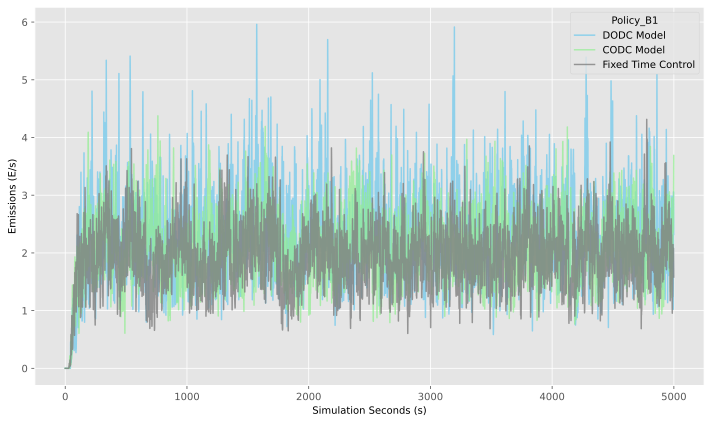

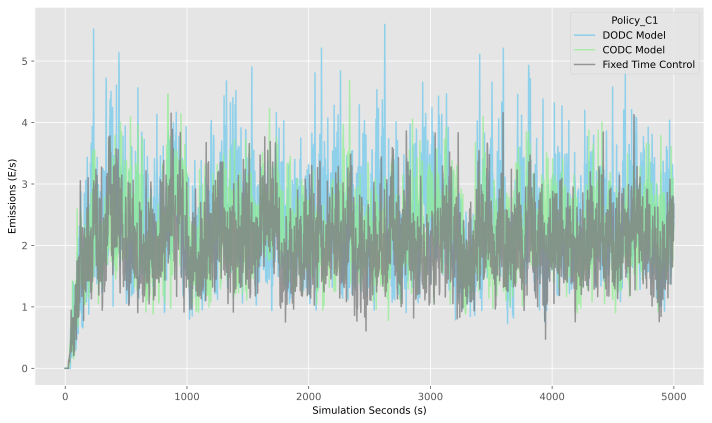

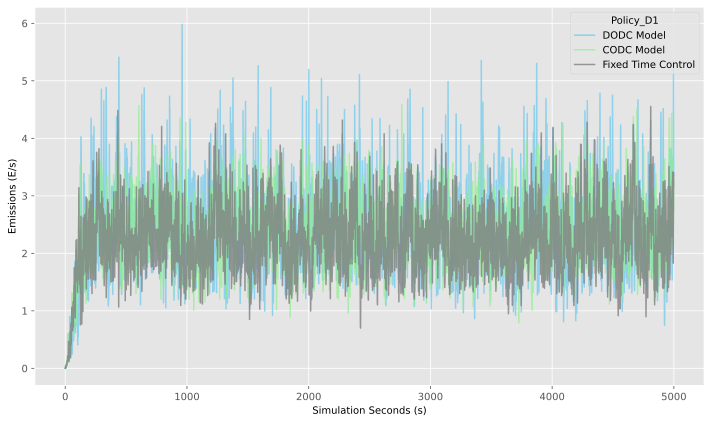

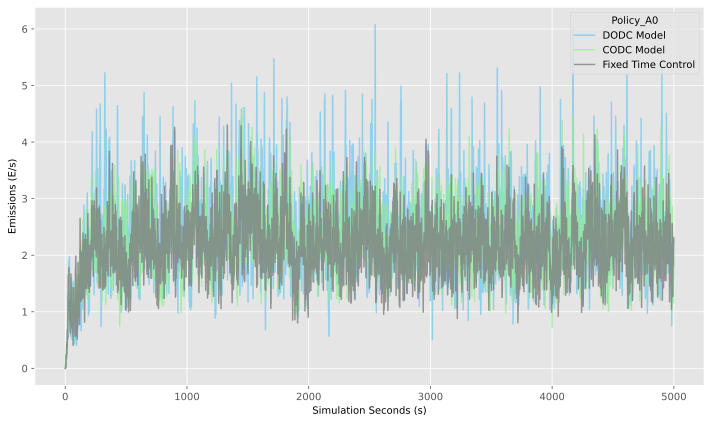

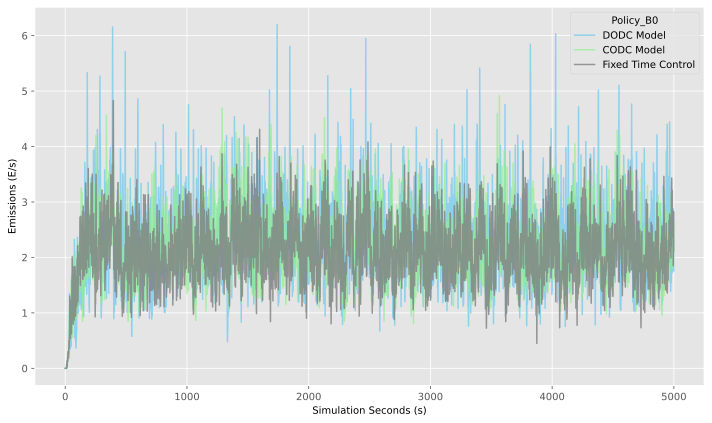

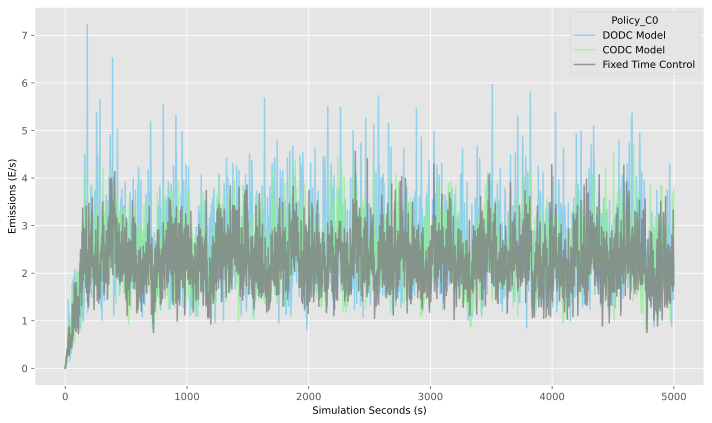

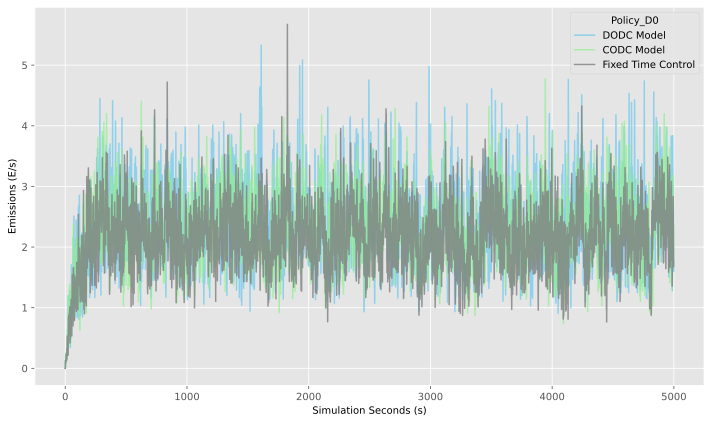

In [75]:
# Enable SVG inline rendering
%config InlineBackend.figure_format = 'svg'

# Set plot style
plt.style.use('ggplot')

# ids = [["A3", "B3", "C3", "D3"],
#       ["A2", "B2", "C2", "D2"],
#        ["A1", "B1", "C1", "D1"],
#        ["A0", "B0", "C0", "D0"]]

ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]

for id in ids:
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=figsize)

    # Histogram for fixed_tc_eval_metrics_averaged_seeds
    ax.plot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='skyblue', alpha=0.9) # label='Fixed TC')
    # Histogram for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='lightgreen', alpha=0.7) # label='CODC'
    # Histogram for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], color='grey', alpha=0.8) # label='DODC')

    # ax[x, y].set_xlabel("Simulation Seconds (s)")
    # ax[x, y].set_ylabel("Emissions (E/s)")
    ax.legend(title=f"Policy_{id}", title_fontsize=12, fontsize=12, loc='upper right')

    ax.set_xlabel("Simulation Seconds (s)")
    ax.set_ylabel("Emissions (E/s)")

    ax.legend(['DODC Model', "CODC Model", "Fixed Time Control"], title=f"Policy_{id}", title_fontsize=10, fontsize=10, loc='upper right')
    # Display plot
    plt.tight_layout(rect=[0, 0, 1, 1])

    plt.savefig(os.path.join(path_to_save_figs, "emissions_series", f"{id}.pdf"))

plt.show()

In [62]:
# # Enable SVG inline rendering
# %config InlineBackend.figure_format = 'svg'

# # Set plot style
# plt.style.use('ggplot')

# fig, ax = plt.subplots(4, 4, figsize=(20,12))

# ids = [["A3", "B3", "C3", "D3"],
#       ["A2", "B2", "C2", "D2"],
#        ["A1", "B1", "C1", "D1"],
#        ["A0", "B0", "C0", "D0"]]

# for x in range(0,4):
#     for y in range(0,4):
#         id = ids[x][y]

#         ax[x, y] # (0, 0), (0, 1), (0, 2), 0,3) 

#         # Histogram for fixed_tc_eval_metrics_averaged_seeds
#         ax[x, y].plot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='skyblue', alpha=0.8) # label='Fixed TC')
#         # Histogram for trained_eval_metrics_reduced_averaged_seeds
#         ax[x, y].plot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='lightgreen', alpha=0.7) # label='CODC'
#         # Histogram for trained_eval_metrics_reduced_averaged_seeds
#         ax[x, y].plot(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], color='grey', alpha=0.7) # label='DODC')

#         # ax[x, y].set_xlabel("Simulation Seconds (s)")
#         # ax[x, y].set_ylabel("Emissions (E/s)")
#         ax[x, y].legend(title=f"Policy_{id}", title_fontsize=10, fontsize=10, loc='upper right')

# ax[3, 0].set_xlabel("Simulation Seconds (s)")
# ax[3, 0].set_ylabel("Emissions (E/s)")
# ax[3, 0].legend(['DODC', "CODC", "Fixed TC"], title=f"Policy_{id}", title_fontsize=10, fontsize=10, loc='upper right')

# # Display plot
# plt.tight_layout(rect=[0, 0, 1, 1])
# plt.show()

## PDFs of System Emissions

In [100]:
import matplotlib.pyplot as plt

# Enable SVG inline rendering
# %config InlineBackend.figure_format = 'svg'
import seaborn as sns

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/278749396.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"], ax=ax, bw_adjust=0.5, color='skyblue', label='Fixed Time Control', shade=True, alpha=0.7)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/278749396.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds["system_abs_accel"], ax=ax, bw_adjust=0.5, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/278749396.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

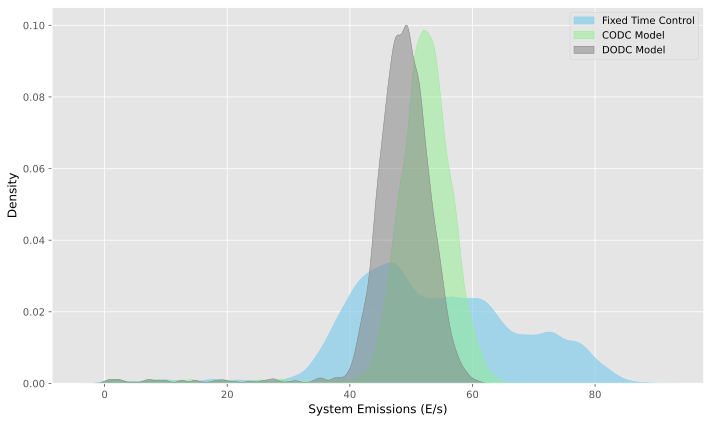

In [102]:
# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=figsize)

# KDE for fixed_tc_eval_metrics_averaged_seeds
sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"], ax=ax, bw_adjust=0.5, color='skyblue', label='Fixed Time Control', shade=True, alpha=0.7)

# KDE for trained_eval_metrics_averaged_seeds
sns.kdeplot(trained_eval_metrics_averaged_seeds["system_abs_accel"], ax=ax, bw_adjust=0.5, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)

# KDE for trained_eval_metrics_reduced_averaged_seeds
sns.kdeplot(trained_eval_metrics_reduced_averaged_seeds["system_abs_accel"], ax=ax, bw_adjust=0.5, color='grey', label='DODC Model', shade=True, alpha=0.5)

# Set titles and labels
# ax.set_title('System Waiting Time Comparison')
ax.set_xlabel('System Emissions (E/s)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Add legend
ax.legend()

# plt.title('Kernel Density Estimation (KDE) Plot with Adjusted Bandwidth')
plt.legend()
# ['bw_adjust=0.5']
# Save plot as PDF
plt.tight_layout(rect=[0, 0, 1, 1])

fig.savefig(os.path.join(path_to_save_figs, "emissions_pdf", "system_emissions_plot.pdf"))

plt.show()



In [65]:
from scipy.stats import gaussian_kde, entropy

# Extract the system absolute acceleration data
data_fixed_tc = fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"]
data_trained_CODC = trained_eval_metrics_averaged_seeds["system_abs_accel"]
data_trained_DODC = trained_eval_metrics_reduced_averaged_seeds["system_abs_accel"]

# Kernel Density Estimation for each dataset
kde_fixed_tc = gaussian_kde(data_fixed_tc, bw_method='scott')
kde_trained_CODC = gaussian_kde(data_trained_CODC, bw_method='scott')
kde_trained_DODC = gaussian_kde(data_trained_DODC, bw_method='scott')

# Evaluate the PDFs on a common set of points
x = np.linspace(min(data_fixed_tc.min(), data_trained_CODC.min(), data_trained_DODC.min()),
                max(data_fixed_tc.max(), data_trained_CODC.max(), data_trained_DODC.max()), 1000)
pdf_fixed_tc = kde_fixed_tc(x)
pdf_trained_CODC = kde_trained_CODC(x)
pdf_trained_DODC = kde_trained_DODC(x)

# Compute Kullback-Leibler Divergence
kld_fixed_vs_CODC = entropy(pdf_fixed_tc, pdf_trained_CODC)
kld_fixed_vs_DODC = entropy(pdf_fixed_tc, pdf_trained_DODC)
kld_CODC_vs_DODC = entropy(pdf_trained_CODC, pdf_trained_DODC)

print(f"KLD between Fixed TC and Trained Model CODC: {kld_fixed_vs_CODC}")
print(f"KLD between Fixed TC and Trained Model DODC: {kld_fixed_vs_DODC}")
print(f"KLD between Trained Model CODC and Trained Model DODC: {kld_CODC_vs_DODC}")

KLD between Fixed TC and Trained Model CODC: 6.404100695619489
KLD between Fixed TC and Trained Model DODC: 14.782328191701433
KLD between Trained Model CODC and Trained Model DODC: 0.3968472785069771


In [66]:
kde_fixed_tc = gaussian_kde(data_fixed_tc, bw_method='scott')

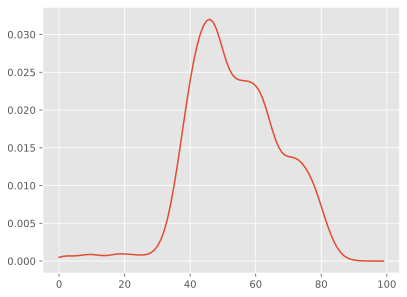

In [67]:
plt.plot(kde_fixed_tc.pdf([x for x in range(100)]))
plt.show()

## PDF Emissions for individual agents

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

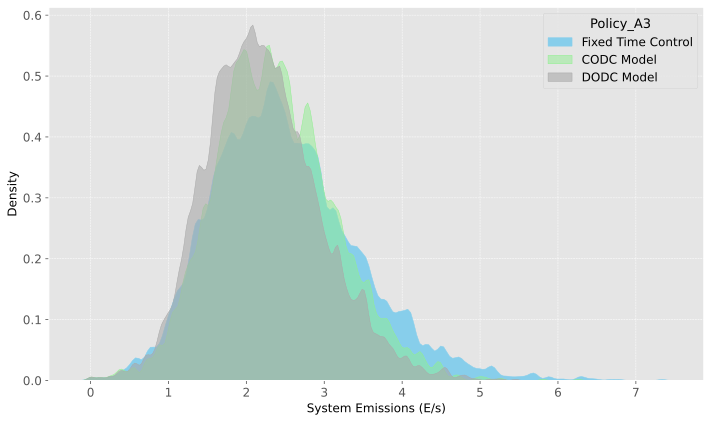

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

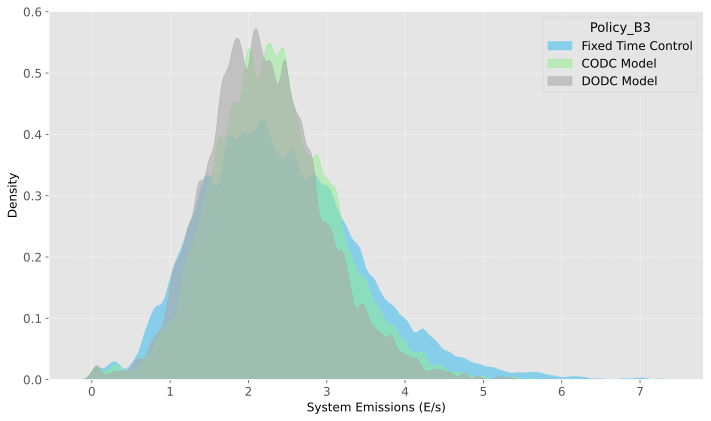

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

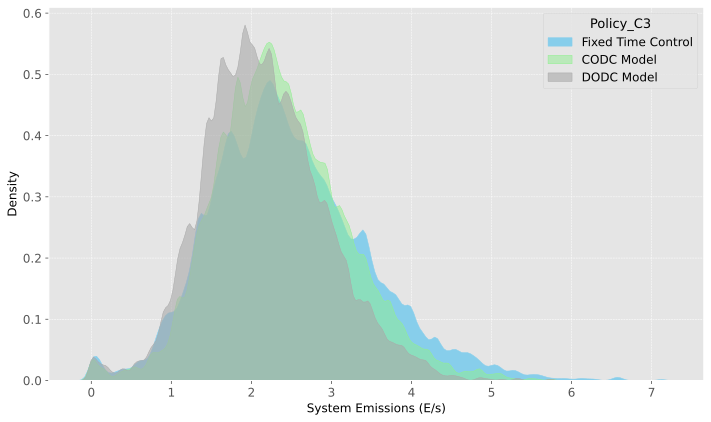

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

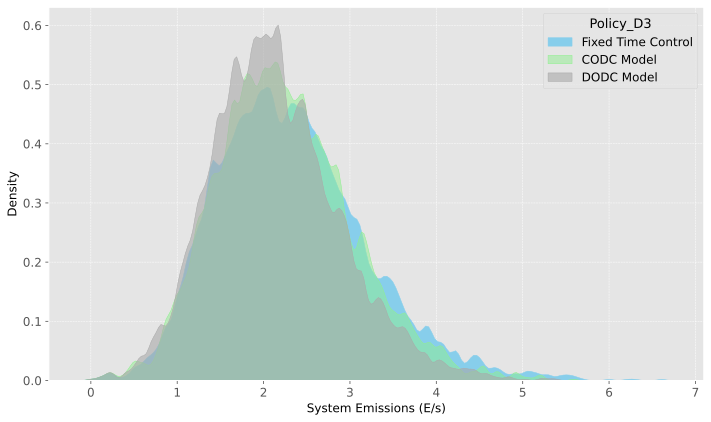

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

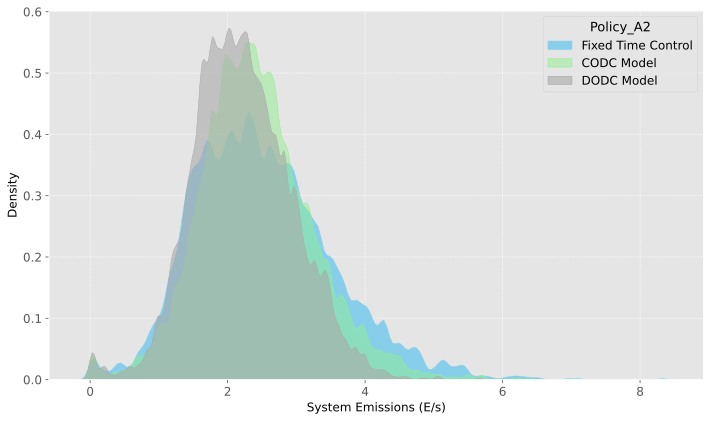

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

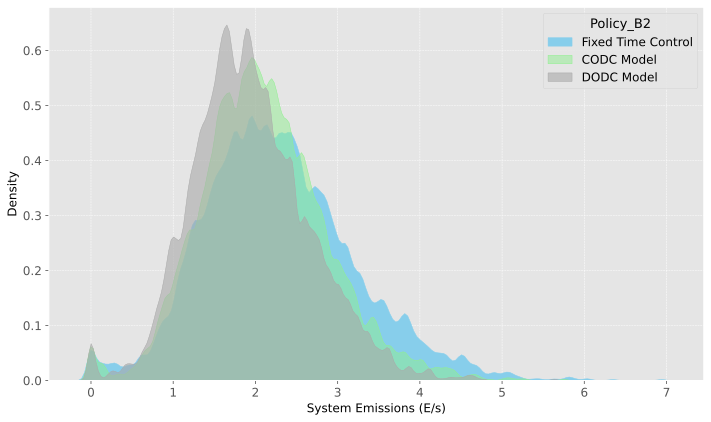

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

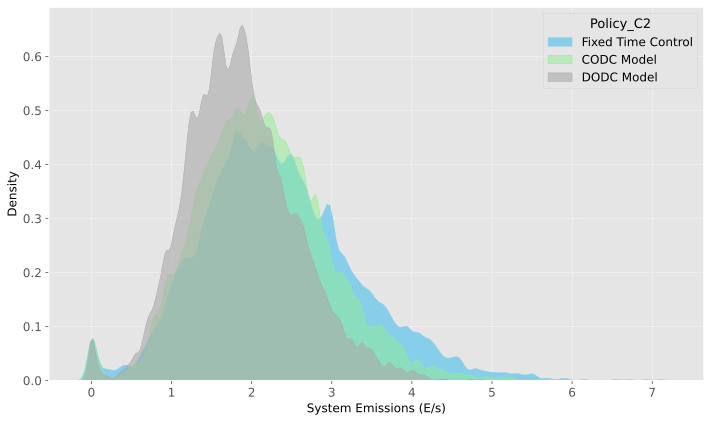

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

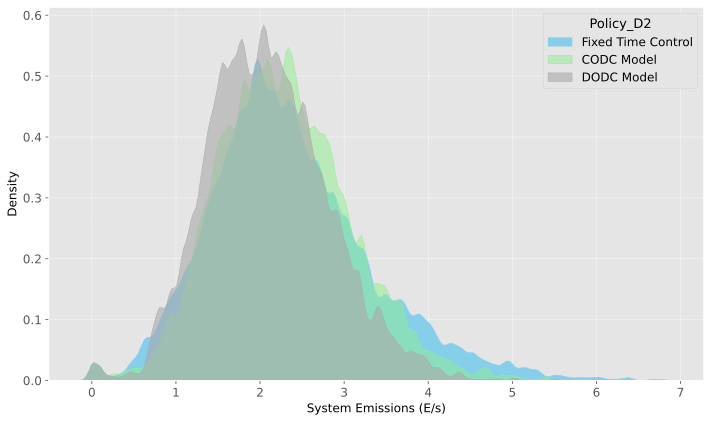

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

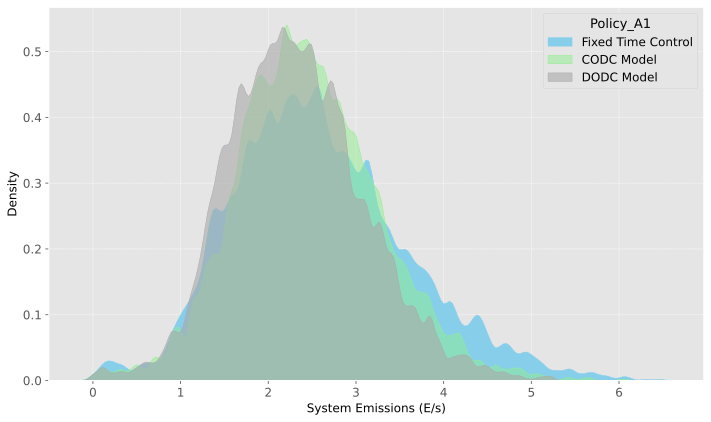

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

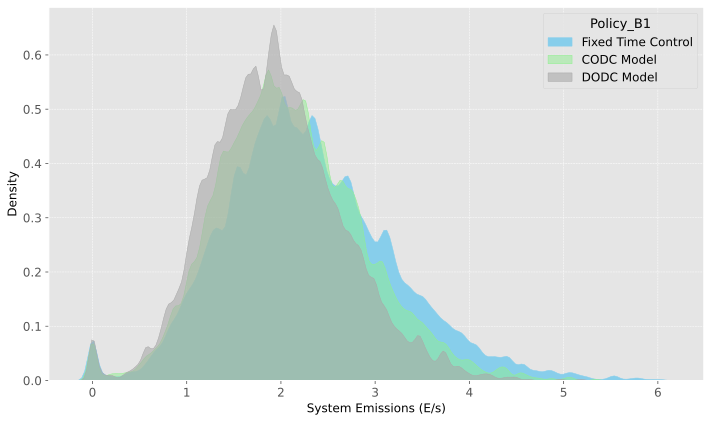

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

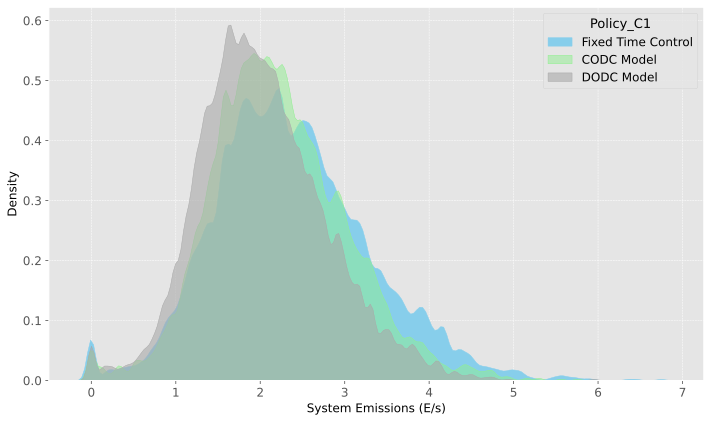

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

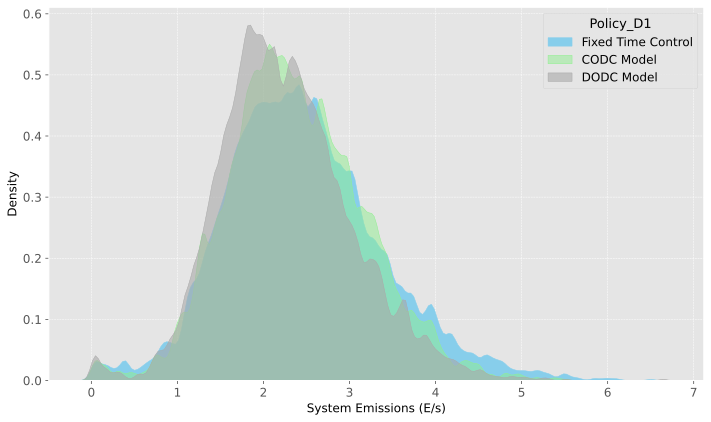

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

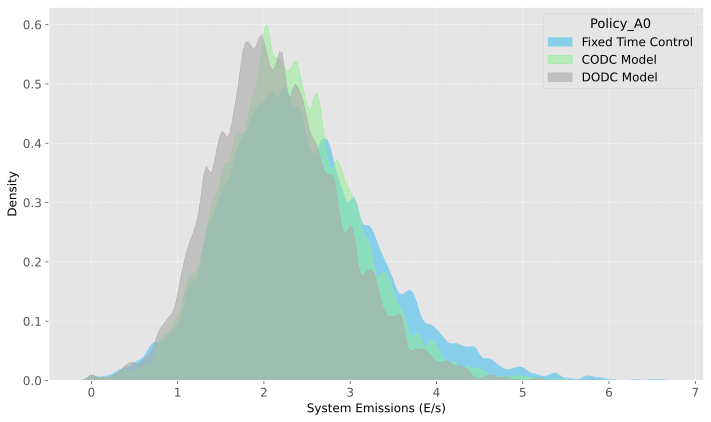

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

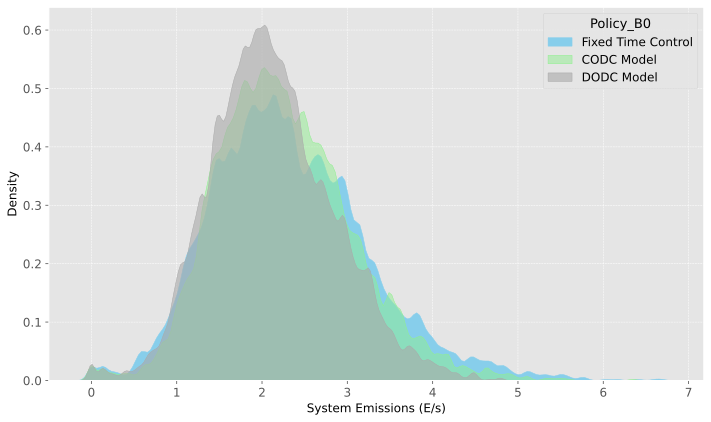

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

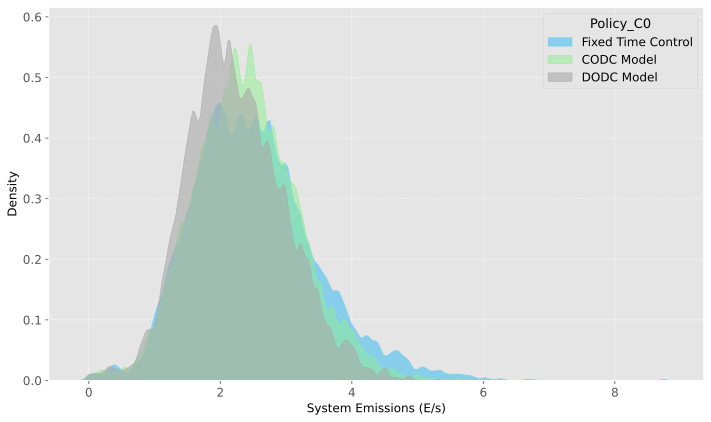

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/2745046464.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

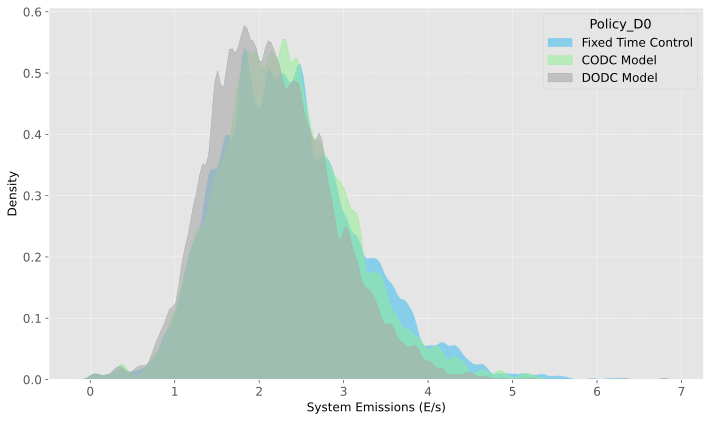

In [97]:
import seaborn as sns

# Set plot style
plt.style.use('ggplot')

for id in ids:
    fig, ax = plt.subplots(figsize=figsize)

    # KDE plot for fixed_tc_eval_metrics_averaged_seeds
    sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='skyblue', label='Fixed Time Control', shade=True, alpha=1)
    
    # KDE plot for trained_eval_metrics_averaged_seeds
    sns.kdeplot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
    
    # KDE plot for trained_eval_metrics_reduced_averaged_seeds
    sns.kdeplot(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], ax=ax, bw_adjust=0.3, color='darkgrey', label='DODC Model', shade=True, alpha=0.6)

    ax.set_xlabel('System Emissions (E/s)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(title=f"Policy_{id}", title_fontsize=13, fontsize=12, loc='upper right')

    # Customize grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Save the plot to a file
    plt.savefig(os.path.join(path_to_save_figs, "emissions_pdf", f"{id}.pdf"))

    # Show the plot
    plt.show()
    plt.close()


## PDF Emissions Series

In [98]:
import matplotlib.pyplot as plt
import os

# Set plot style
plt.style.use('ggplot')

# Assuming `fixed_tc_eval_metrics_averaged_seeds`, `trained_eval_metrics_averaged_seeds`, and `trained_eval_metrics_reduced_averaged_seeds` are provided
ids = ["A3", "B3", "C3", "D3", "A2", "B2", "C2", "D2", "A1", "B1", "C1", "D1", "A0", "B0", "C0", "D0"]

for id in ids:
    fig, ax = plt.subplots(figsize=figsize)

    # Line plot for fixed_tc_eval_metrics_averaged_seeds
    ax.plot(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='skyblue', alpha=0.9, label='Fixed Time Control', linestyle='-', marker='o', markersize=2)
    
    # Line plot for trained_eval_metrics_averaged_seeds
    ax.plot(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], color='lightgreen', alpha=0.9, label='CODC Model', linestyle='-', marker='^', markersize=2)
    
    # Line plot for trained_eval_metrics_reduced_averaged_seeds
    ax.plot(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], color='darkgrey', alpha=0.9, label='DODC Model', linestyle='-', marker='s', markersize=2)

    ax.set_xlabel("Simulation Seconds (s)", fontsize=12)
    ax.set_ylabel("Emissions (E/s)", fontsize=12)
    ax.legend(title=f"Policy_{id}", title_fontsize=13, fontsize=12, loc='upper right')

    # Customize grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Save the plot to a file
    plt.savefig(os.path.join(path_to_save_figs, "emissions_series", f"{id}.pdf"))

    # Show the plot
    plt.show()
    plt.close()

## PDF of System Average Wait Times

/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/489354751.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds["sys_avg_wait"], ax=ax, bw_adjust=0.4, color='skyblue', label='Fixed Time Control', shade=True, alpha=0.7)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/489354751.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trained_eval_metrics_averaged_seeds["sys_avg_wait"], ax=ax, bw_adjust=0.4, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_2571/489354751.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please

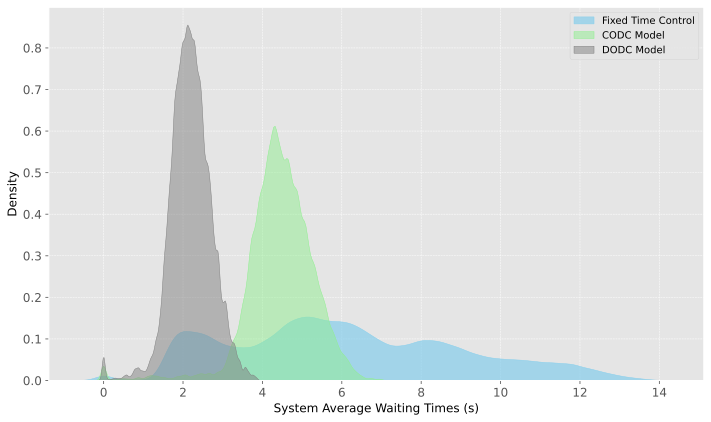

In [70]:
# Set plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,6))

# KDE for fixed_tc_eval_metrics_averaged_seeds
sns.kdeplot(fixed_tc_eval_metrics_averaged_seeds["sys_avg_wait"], ax=ax, bw_adjust=0.4, color='skyblue', label='Fixed Time Control', shade=True, alpha=0.7)

# KDE for trained_eval_metrics_averaged_seeds
sns.kdeplot(trained_eval_metrics_averaged_seeds["sys_avg_wait"], ax=ax, bw_adjust=0.4, color='lightgreen', label='CODC Model', shade=True, alpha=0.5)

# KDE for trained_eval_metrics_reduced_averaged_seeds
sns.kdeplot(trained_eval_metrics_reduced_averaged_seeds["sys_avg_wait"], bw_adjust=0.4, ax=ax, color='grey', label='DODC Model', shade=True, alpha=0.5)

# Set titles and labels
# ax.set_title('System Waiting Time Comparison')
ax.set_xlabel('System Average Waiting Times (s)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])

# Add legend
ax.legend()

fig.savefig(os.path.join(path_to_save_figs, "avg_wait_pdf", "system_avg_wait.pdf"))
# Save plot as PDF
plt.tight_layout(rect=[0, 0, 1, 1])

## Raw Histogram of System Average Wait Times

In [71]:
# import matplotlib.pyplot as plt

# # Enable SVG inline rendering
# %config InlineBackend.figure_format = 'svg'

# # Set plot style
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(9, 5))

# # Histogram for fixed_tc_eval_metrics_averaged_seeds
# ax.hist(fixed_tc_eval_metrics_averaged_seeds["sys_avg_wait"], bins=40, color='skyblue', alpha=0.7, edgecolor='grey', label='Fixed TC')

# # Histogram for trained_eval_metrics_reduced_averaged_seeds
# ax.hist(trained_eval_metrics_averaged_seeds["sys_avg_wait"], bins=40, color='lightgreen', alpha=0.5, edgecolor='grey', label='Trained Model CODC')

# # Histogram for trained_eval_metrics_reduced_averaged_seeds
# ax.hist(trained_eval_metrics_reduced_averaged_seeds["sys_avg_wait"], bins=40, color='grey', alpha=0.5, edgecolor='grey', label='Trained Model DODC')

# # Set titles and labels
# # ax.set_title('system_waiting_time Comparison')
# ax.set_xlabel('System Average Waiting Times')
# ax.set_ylabel('Frequency')

# # Add legend
# ax.legend()

# # Display plot
# plt.tight_layout(rect=[0,0,1,1])
# plt.show()

## Raw Emissions Hist for all individual policies

In [72]:
# import matplotlib.pyplot as plt

# # Enable SVG inline rendering
# %config InlineBackend.figure_format = 'svg'

# # Set plot style
# plt.style.use('ggplot')

# fig, ax = plt.subplots(4, 4, figsize=(20,15))

# ids = [["A3", "B3", "C3", "D3"],
#       ["A2", "B2", "C2", "D2"],
#        ["A1", "B1", "C1", "D1"],
#        ["A0", "B0", "C0", "D0"]]

# for x in range(0,4):
#     for y in range(0,4):
#         id = ids[x][y]

#         ax[x, y] # (0, 0), (0, 1), (0, 2), 0,3) 

#         # Histogram for fixed_tc_eval_metrics_averaged_seeds
#         ax[x, y].hist(fixed_tc_eval_metrics_averaged_seeds[f"{id}_abs_accel"], bins=40, color='skyblue', alpha=0.7, edgecolor='grey', label='Fixed TC')
#         # Histogram for trained_eval_metrics_reduced_averaged_seeds
#         ax[x, y].hist(trained_eval_metrics_averaged_seeds[f"{id}_abs_accel"], bins=40, color='lightgreen', alpha=0.5, edgecolor='grey', label='CODC')
#         # Histogram for trained_eval_metrics_reduced_averaged_seeds
#         ax[x, y].hist(trained_eval_metrics_reduced_averaged_seeds[f"{id}_abs_accel"], bins=40, color='grey', alpha=0.5, edgecolor='grey', label='DODC')

#         ax[x, y].set_title(f"Policy_{id}")
#         ax[x, y].set_xlabel(f"Emissions (E/s)")
#         ax[x, y].set_ylabel('Frequency')
#         ax[x, y].legend()

# # Display plot
# plt.tight_layout(rect=[0, 0, 1, 1])
# plt.show()

## Extra Metrics during evaluation 

In [73]:
fixed_tc_extra_metrics_concat = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='fixed_tc', csv_file_name="extra_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_extra_metrics_concat =  pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name="extra_metrics.csv", seed=seed) for seed in SUMO_SEEDS])
trained_extra_metrics_reduced = pd.concat([get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[2], eval_dir='trained', csv_file_name="extra_metrics.csv", seed=seed) for seed in SUMO_SEEDS])

In [74]:
all_metrics = [fixed_tc_extra_metrics_concat,
           trained_extra_metrics_concat,
           trained_extra_metrics_reduced]

In [75]:
model_reward_seed = pd.DataFrame([fixed_tc_extra_metrics_concat.sum().iloc[1:],
                                     trained_extra_metrics_concat.sum().iloc[1:],
                                     trained_extra_metrics_reduced.sum().iloc[1:]], 
                                     index=['Fixed Time Control',
                                            'CODC Model',
                                            "DODC Model"])


In [76]:
model_reward_seed['total_agent_reward']/16

Fixed Time Control   -1925.838640
CODC Model           -1624.621962
DODC Model           -1368.579148
Name: total_agent_reward, dtype: float64

In [77]:
pprint(model_reward_seed['total_agent_reward'].to_latex())

('\\begin{tabular}{lr}\n'
 '\\toprule\n'
 ' & total_agent_reward \\\\\n'
 '\\midrule\n'
 'Fixed Time Control & -30813.418246 \\\\\n'
 'CODC Model & -25993.951388 \\\\\n'
 'DODC Model & -21897.266363 \\\\\n'
 '\\bottomrule\n'
 '\\end{tabular}\n')


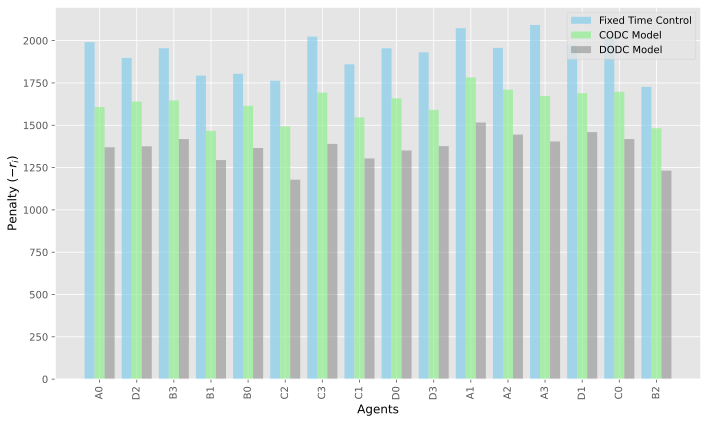

In [78]:
# Plotting the grouped bar chart

agent_rewards = -1*(model_reward_seed.drop(columns=["total_agent_reward"]))
fig, ax = plt.subplots(figsize=figsize)

colours = ["skyblue", "lightgreen", "grey"]
alphas = [0.7, 0.7, 0.5]

bar_width = 0.27
x = np.arange(len(agent_rewards.columns))

for i, model in enumerate(agent_rewards.index):
    ax.bar(x + i * bar_width, agent_rewards.loc[model], bar_width, color = colours[i], label=model, alpha=alphas[i])

ax.set_xlabel('Agents', fontsize=12)
ax.set_ylabel(r'Penalty ($-r_i$)', fontsize=12)
# ax.set_title('Agent Rewards by Control Method')
ax.set_xticks(x + bar_width)

cols_names = list(agent_rewards.columns)
xlabels = [agent_name.split("_")[-1] for agent_name in cols_names]

ax.set_xticklabels(xlabels, rotation=90)
ax.legend()

fig.tight_layout()

fig.savefig(os.path.join(path_to_save_figs, "individual_agent_penalty.pdf"))
plt.show()

In [79]:
model_reward_seed

reward_A0    reward_D2    reward_B3    reward_B1    reward_B0    reward_C2    reward_C3    reward_C1    reward_D0    reward_D3    reward_A1    reward_A2    reward_A3    reward_D1    reward_C0    reward_B2  total_agent_reward
Fixed Time Control -1991.416709 -1897.636365 -1955.060849 -1793.428465 -1803.920484 -1763.002452 -2023.765701 -1860.292054 -1954.805114 -1931.104657 -2073.847260 -1957.053027 -2092.656748 -1972.163105 -2016.418942 -1726.846317       -30813.418246
CODC Model         -1607.602329 -1639.688591 -1646.332046 -1466.742248 -1614.872019 -1493.591790 -1692.915509 -1546.484590 -1659.529439 -1591.283947 -1782.561804 -1710.049713 -1672.969813 -1689.476104 -1697.638421 -1482.213026       -25993.951388
DODC Model         -1369.884076 -1375.967158 -1418.256951 -1294.413136 -1365.433328 -1178.023185 -1389.805682 -1303.657968 -1351.205633 -1376.593206 -1515.903780 -1444.584760 -1404.020930 -1459.385987 -1418.187451 -1231.943133       -21897.266363

In [80]:
# Plotting the grouped bar chart
fixed_tc_extra_metrics_concat_dropped = fixed_tc_extra_metrics_concat.drop(columns=['total_agent_reward', "env_step_num"])
fixed_tc_extra_metrics_averaged_seeds = fixed_tc_extra_metrics_concat_dropped.groupby(fixed_tc_extra_metrics_concat_dropped.index).mean()

## Stationary Tests + KS Tests

In [81]:
fixed = fixed_tc_eval_metrics_averaged_seeds["system_abs_accel"] 
model_CODC = trained_eval_metrics_averaged_seeds["system_abs_accel"]
model_DODC = trained_eval_metrics_reduced_averaged_seeds["system_abs_accel"]

In [82]:
from scipy import stats
# Kolmogorov-Smirnov Test for normality
ks_DODC = stats.kstest(model_DODC, 'norm', args=(model_DODC.mean(), model_DODC.std()))
ks_CODC = stats.kstest(model_CODC, 'norm', args=(model_CODC.mean(), model_CODC.std()))

ks_fixed = stats.kstest(fixed, 'norm', args=(fixed.mean(), fixed.std()))

print(f'Kolmogorov-Smirnov Test for DODC: Statistics={ks_DODC.statistic}, p={ks_DODC.pvalue}')
print(f'Kolmogorov-Smirnov Test for CODC: Statistics={ks_CODC.statistic}, p={ks_CODC.pvalue}')

print(f'Kolmogorov-Smirnov Test for ks_fixed: Statistics={ks_fixed.statistic}, p={ks_fixed.pvalue}')

Kolmogorov-Smirnov Test for DODC: Statistics=0.1485035593393535, p=1.0251042040833284e-96
Kolmogorov-Smirnov Test for CODC: Statistics=0.1552205959487259, p=1.1388191354727654e-105
Kolmogorov-Smirnov Test for ks_fixed: Statistics=0.04765998202486066, p=2.6169111573719205e-10


In [83]:
ks_test_statistic_df = pd.DataFrame(columns=['Statistic', 'p-value'], 
                                 index=['Fixed Time',
                                        'CODC Model',
                                        'DODC Model'])

In [84]:
ks_test_statistic_df.loc['Fixed Time', 'Statistic'] = 25
ks_test_statistic_df.loc['CODC Model', 'Statistic'] = 284
ks_test_statistic_df.loc['DODC Model', 'Statistic'] = 249

ks_test_statistic_df.loc['Fixed Time', 'p-value'] = 0
ks_test_statistic_df.loc['CODC Model', 'p-value'] = 0
ks_test_statistic_df.loc['DODC Model', 'p-value'] = 0

In [85]:
ks_test_statistic_df

Statistic p-value
Fixed Time        25       0
CODC Model       284       0
DODC Model       249       0

In [86]:
from pprint import pprint
pprint(ks_test_statistic_df.to_latex())

('\\begin{tabular}{lll}\n'
 '\\toprule\n'
 ' & Statistic & p-value \\\\\n'
 '\\midrule\n'
 'Fixed Time & 25 & 0 \\\\\n'
 'CODC Model & 284 & 0 \\\\\n'
 'DODC Model & 249 & 0 \\\\\n'
 '\\bottomrule\n'
 '\\end{tabular}\n')


followed by a Kolmogorov-Smirnov test for normality \ref{Tests for significance} showed rejection of Null hypothesis - that the data is non-normally distributed. A Man Whitney U Test for statistical difference demonstrated that both models (CODC, DODC) are statistically significant from the fixed_time control baseline, \ref{fig:Man Whitney U Test}. 

In [87]:
# Anderson-Darling Test for normality
ad_DODC = stats.anderson(model_DODC, dist='norm')
ad_CODC = stats.anderson(model_CODC, dist='norm')
ad_fixed = stats.anderson(fixed, dist='norm')

print(f'Anderson-Darling Test for DODC: Statistics={ad_DODC.statistic}, Critical Values={ad_DODC.critical_values}, Significance Level={ad_DODC.significance_level}')
print(f'Anderson-Darling Test for CODC: Statistics={ad_CODC.statistic}, Critical Values={ad_CODC.critical_values}, Significance Level={ad_CODC.significance_level}')
print(f'Anderson-Darling Test for Fixed: Statistics={ad_fixed.statistic}, Critical Values={ad_fixed.critical_values}, Significance Level={ad_fixed.significance_level}')

# Function to interpret Anderson-Darling test results
def interpret_anderson_darling(result):
    for i in range(len(result.critical_values)):
        significance_level, critical_value = result.significance_level[i], result.critical_values[i]
        if result.statistic < critical_value:
            print(f'{significance_level}%: Statistic {result.statistic:.3f} < Critical Value {critical_value:.3f} (Fail to reject H0: Data is normally distributed)')
        else:
            print(f'{significance_level}%: Statistic {result.statistic:.3f} >= Critical Value {critical_value:.3f} (Reject H0: Data is not normally distributed)')

# print('\n')
# # Interpret the Anderson-Darling test results
# print('Anderson-Darling Test Interpretation for DODC:')
# interpret_anderson_darling(ad_DODC)
# print('\n')

# print('Anderson-Darling Test Interpretation for CODC:')
# interpret_anderson_darling(ad_CODC)
# print('\n')

# print('Anderson-Darling Test Interpretation for fixed:')
# interpret_anderson_darling(ad_fixed)
# print('\n')

Anderson-Darling Test for DODC: Statistics=249.02966729110267, Critical Values=[0.576 0.655 0.786 0.917 1.091], Significance Level=[15.  10.   5.   2.5  1. ]
Anderson-Darling Test for CODC: Statistics=284.150010173963, Critical Values=[0.576 0.655 0.786 0.917 1.091], Significance Level=[15.  10.   5.   2.5  1. ]
Anderson-Darling Test for Fixed: Statistics=24.648471799024264, Critical Values=[0.576 0.655 0.786 0.917 1.091], Significance Level=[15.  10.   5.   2.5  1. ]


Kruskal Wallis H test -> 

In [88]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H test
stat, p = kruskal(fixed, model_CODC, model_DODC)

print(f'Kruskal-Wallis H test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the groups")

Kruskal-Wallis H test statistic: 1160.4494988408283
p-value: 1.0270534907767142e-252
Reject the null hypothesis - there is a significant difference between the groups


ManWhitneyu Test

In [89]:
from scipy.stats import mannwhitneyu
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(fixed, model_DODC)
                       
print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.01:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Mann-Whitney U test statistic: 15257350.5
p-value: 2.4056194989431936e-81
Reject the null hypothesis - there is a significant difference between the two groups


In [90]:
from scipy.stats import mannwhitneyu
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(fixed, model_CODC)
                       
print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.01:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Mann-Whitney U test statistic: 12962767.5
p-value: 0.0013460169266083977
Reject the null hypothesis - there is a significant difference between the two groups


In [91]:
test_statistic_df = pd.DataFrame(columns=['Statistic', 'p-value'], 
                                 index=['CODC Model',
                                       'DODC Model'])

In [92]:
test_statistic_df.loc['CODC Model', 'Statistic'] = 12962767.5
test_statistic_df.loc['DODC Model', 'Statistic'] = 15257350.5

test_statistic_df.loc['CODC Model', 'p-value'] = 0
test_statistic_df.loc['DODC Model', 'p-value'] = 0

In [93]:
test_statistic_df


Statistic p-value
CODC Model  12962767.5       0
DODC Model  15257350.5       0

In [94]:
from pprint import pprint
pprint(test_statistic_df.to_latex())

('\\begin{tabular}{lll}\n'
 '\\toprule\n'
 ' & Statistic & p-value \\\\\n'
 '\\midrule\n'
 'CODC Model & 12962767.500000 & 0 \\\\\n'
 'DODC Model & 15257350.500000 & 0 \\\\\n'
 '\\bottomrule\n'
 '\\end{tabular}\n')


Independent T-test

In [95]:
# Perform the independent t-test
from scipy.stats import ttest_ind, ttest_rel

stat, p = ttest_ind(fixed, model_CODC)

print(f'Independent t-test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Independent t-test statistic: 9.807410392196543
p-value: 1.3228406927852218e-22
Reject the null hypothesis - there is a significant difference between the two groups


In [96]:
# Perform the independent t-test
from scipy.stats import ttest_ind, ttest_rel

stat, p = ttest_ind(fixed, model_DODC)

print(f'Independent t-test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the two groups")

Independent t-test statistic: 25.683264577502328
p-value: 6.247357422487575e-141
Reject the null hypothesis - there is a significant difference between the two groups


Paired T test

In [206]:
# Perform the paired t-test
stat, p = ttest_rel(fixed, model_CODC)

print(f'Paired t-test statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the paired groups")
else:
    print("Fail to reject the null hypothesis - no significant difference between the paired groups")

Paired t-test statistic: 12.266881835914397
p-value: 4.201353341398945e-34
Reject the null hypothesis - there is a significant difference between the paired groups


## Check stationarity

In [207]:
from statsmodels.tsa.stattools import adfuller

In [208]:
# Check stationarity for emissions and waiting times

def generate_adf_stats_eval_metrics(eval_metrics_df):
    adf_result_emissions = adfuller(eval_metrics_df['system_abs_accel'])
    adf_result_waiting = adfuller(eval_metrics_df['sys_accum_waiting_time'])

    stationarity = pd.DataFrame(columns=['ADF Statistic', 'p-value'])
    stationarity.loc['Emissions', 'ADF Statistic'] = adf_result_emissions[0]
    stationarity.loc["Emissions", 'p-value'] = adf_result_emissions[1]

    stationarity.loc['Waiting Times', 'ADF Statistic'] = adf_result_waiting[0]
    stationarity.loc["Waiting Times", 'p-value'] = adf_result_waiting[1]

    return stationarity

In [209]:
generate_adf_stats_eval_metrics(fixed_tc_eval_metrics_averaged_seeds)

ADF Statistic p-value
Emissions         -9.869905     0.0
Waiting Times     -8.696727     0.0

In [210]:
generate_adf_stats_eval_metrics(trained_eval_metrics_averaged_seeds)

ADF Statistic p-value
Emissions         -9.994724     0.0
Waiting Times     -6.632221     0.0

In [211]:
generate_adf_stats_eval_metrics(trained_eval_metrics_reduced_averaged_seeds)

ADF Statistic p-value
Emissions        -10.344998     0.0
Waiting Times      -6.59072     0.0

In [212]:
differences = pd.DataFrame()

differences['diff_model_emissions'] = trained_eval_metrics_averaged_seeds['system_abs_accel'] - fixed_tc_eval_metrics_averaged_seeds['system_abs_accel']
differences['diff_model_delay'] = trained_eval_metrics_averaged_seeds['sys_accum_waiting_time'] - fixed_tc_eval_metrics_averaged_seeds['sys_accum_waiting_time']

differences['diff_reduced_obs_model_emissions'] = trained_eval_metrics_reduced_averaged_seeds['system_abs_accel'] - fixed_tc_eval_metrics_averaged_seeds['system_abs_accel']
differences['diff_reduced_obs_model_delay'] = trained_eval_metrics_reduced_averaged_seeds['sys_accum_waiting_time'] - fixed_tc_eval_metrics_averaged_seeds['sys_accum_waiting_time']

differences.columns

Index(['diff_model_emissions', 'diff_model_delay', 'diff_reduced_obs_model_emissions', 'diff_reduced_obs_model_delay'], dtype='object')

## Wilcoxin Significance Tests

In [213]:
import pandas as pd
from scipy.stats import wilcoxon

# Perform the Wilcoxon Signed-Rank Test
wilcoxon_result_emissions = wilcoxon(differences['diff_model_emissions'])
wilcoxon_result_waiting = wilcoxon(differences['diff_model_delay'])

wilcoxon_result_emissions_reduced_obs = wilcoxon(differences['diff_reduced_obs_model_emissions'])
wilcoxon_result_waiting_reduced_obs = wilcoxon(differences['diff_reduced_obs_model_delay'])

# Print the results
print(f'Wilcoxon Test Result for Model 1 Emissions: {wilcoxon_result_emissions}')
print(f'Wilcoxon Test Result for Model 2 Emissions: {wilcoxon_result_emissions_reduced_obs}')
print(f'Wilcoxon Test Result for Model 1 Waiting Times: {wilcoxon_result_waiting}')
print(f'Wilcoxon Test Result for Model 2 Waiting Times: {wilcoxon_result_waiting_reduced_obs}')

Wilcoxon Test Result for Model 1 Emissions: WilcoxonResult(statistic=5314814.0, pvalue=2.8988256972785287e-18)
Wilcoxon Test Result for Model 2 Emissions: WilcoxonResult(statistic=3624395.0, pvalue=4.153089446904586e-142)
Wilcoxon Test Result for Model 1 Waiting Times: WilcoxonResult(statistic=0.0, pvalue=0.0)
Wilcoxon Test Result for Model 2 Waiting Times: WilcoxonResult(statistic=0.0, pvalue=0.0)


Wilcoxin Significance Results

In [214]:
columns = ['statistic', 'pvalue']
index = ['Model 1', 'Model 2']

wilcoxin_tests = pd.DataFrame([[wilcoxon_result_emissions.statistic, wilcoxon_result_emissions.pvalue],
                               [wilcoxon_result_emissions_reduced_obs.statistic, wilcoxon_result_emissions_reduced_obs.pvalue]],
                             columns = columns, index=index)
wilcoxin_tests

statistic         pvalue
Model 1  5314814.0   2.898826e-18
Model 2  3624395.0  4.153089e-142

Waiting times significance tests

In [215]:
columns = ['statistic', 'pvalue']
index = ['model_CODC', 'model_DODC']

wilcoxin_tests = pd.DataFrame([[wilcoxon_result_waiting.statistic, wilcoxon_result_waiting.pvalue],
                               [wilcoxon_result_waiting_reduced_obs.statistic, wilcoxon_result_waiting_reduced_obs.pvalue]],
                             columns = columns, index=index)
wilcoxin_tests

statistic  pvalue
model_CODC        0.0     0.0
model_DODC        0.0     0.0

Figure {} shows the results of Wilcoxon signed-rank tests for two sets of models compared against a fixed control baseline. 
Both models (Model 1 and Model 2) show statistically significant differences compared to the baseline, as indicated by their very low p-values (much less than 0.05). Model 1 has a smaller p-value than Model 2, suggesting a more significant difference from the baseline.

The low p-values in both tests suggest that the differences observed between the models and the control baseline are statistically significant, meaning it is highly unlikely that these differences are due to random chance.
Model 1 seems to have a more pronounced effect in both cases (Wilcoxon Test and Waiting times) given its lower p-values compared to Model 2.

## Compare diff_accum_wait time across alpha = 0.5 and alpha = 1

In [216]:
TRAINED_CHECKPOINT_PATHS = ["local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5", 
                            "local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-14_19_46__alpha_1"]
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join(os.path.abspath('../'), x) for x in TRAINED_CHECKPOINT_PATHS]
print(TRAINED_CHECKPOINT_PATHS_ABS)

['/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5', '/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-14_19_46__alpha_1']


In [217]:
fixed_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=10)
trained_0_5_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=10)
trained_1_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=10)

fixed_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=22)
trained_0_5_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)
trained_1_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)

fixed_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=39)
trained_0_5_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)
trained_1_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)

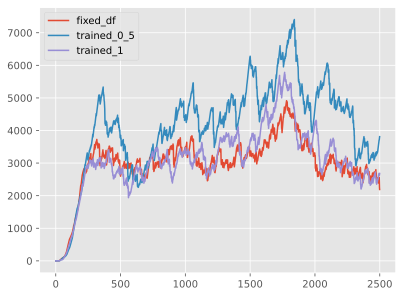

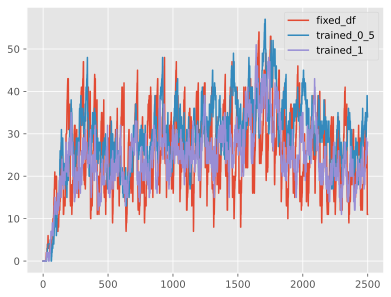

In [218]:
import matplotlib.pyplot as plt

fixed_df_seed_10['sys_accum_waiting_time'].plot(legend='fixed_df')
trained_0_5_df_seed_10['sys_accum_waiting_time'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_accum_waiting_time'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

fixed_df_seed_10['sys_total_stopped'].plot(legend=['fixed_df'])
trained_0_5_df_seed_10['sys_total_stopped'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_total_stopped'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()